- 비지도 학습
  - 군집(Clustering) : 비지도 학습의 한 종류, 데이터 포인터를 유사성에 따라 묶어 의미있는 그룹(군집)을 형성
  - K-평균(K-Means)
    - 데이터를 k개의 클러스터 나눈다
    - 각 클러스터의 중심(centroid)와 데이터 포인트 간의 거리(유클리디안 거리등)를 최소화
    - 간단하고 계산 속도가 빠르지만, 클러스터 개수를 사전에 정의해야 합니다
  - DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
    - 데이터 밀도 기반 클러스터링
    - 밀도가 높은 영역은 클러스터로 구분하며, 클러스터의 수를 사전에 지정할 필요가 없다
  - 계층적 군집
    - 데이터를 계층구조로 클러스터링
    - 병합형 과 분할형 방법이 있음
  - Gaussian(정규분포를 생각) Mixture Model(GMM)
    - 데이터가 여러개의 정규 분포를 따른다고 가정하고 클러스터링
    - K-평균과 유사하지만 더 유연한 군집화가 가능하다


# K-Mean 군집화

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 데이터 생성
data,labels = make_blobs(n_samples=300, centers=4, cluster_std=2.5, random_state=42)

<ipython-input-29-a83fd596b237>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],


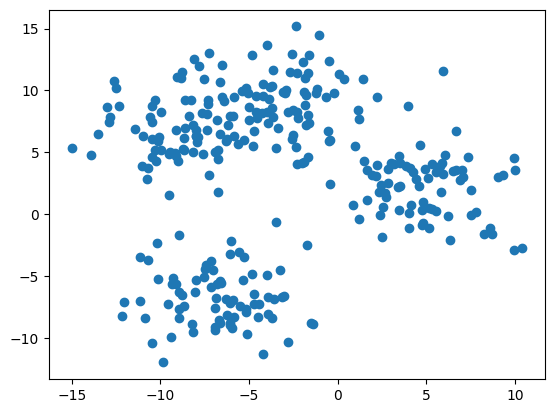

In [29]:
# 학습용 데이터 시각화
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')
plt.show()

In [31]:
# 모델
k_means = KMeans(n_clusters=4)
predict = k_means.fit_predict(data)

In [32]:
k_means.cluster_centers_

array([[-8.85745708,  6.94511083],
       [ 4.94770283,  1.95922932],
       [-6.71804263, -6.67481906],
       [-2.33196662,  9.11755602]])

<ipython-input-33-31eabc6b376a>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],


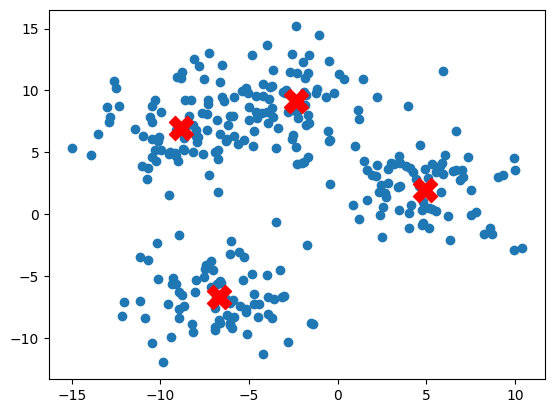

In [33]:
# 군집을 나눈 결과를 시각화
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')  # 원본데이터의 모습
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,
            c='red',
            marker='X')  # 군집의 중심
plt.show()

# 최적의 k개 찾기
  - SSE(Sum of Squared Errors) : 각 데이터 포인트와 해당 클러서 중심점 사이의 거리의 제곱합
  - 작을수록 성능이 좋다
  - k개를 작은수부터 증가하면서 SSE 값을 보면 급격하게 변화는 지점(팔꿈치모양-엘보우)

In [34]:
k_means.inertia_

3276.294246334409

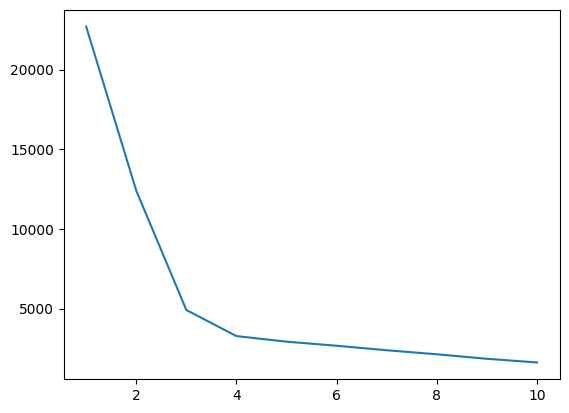

In [35]:
# k 1 ~ 10 까지 증가시면서 k_means.inertia_을 리스트에 저장하고 시각화 - 엘보우 찾기
sse = []
for k in range(1,11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    sse.append(k_means.inertia_)
plt.plot(range(1,11), sse)
plt.show()

<ipython-input-37-d98407eb3ba8>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],
<ipython-input-37-d98407eb3ba8>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],


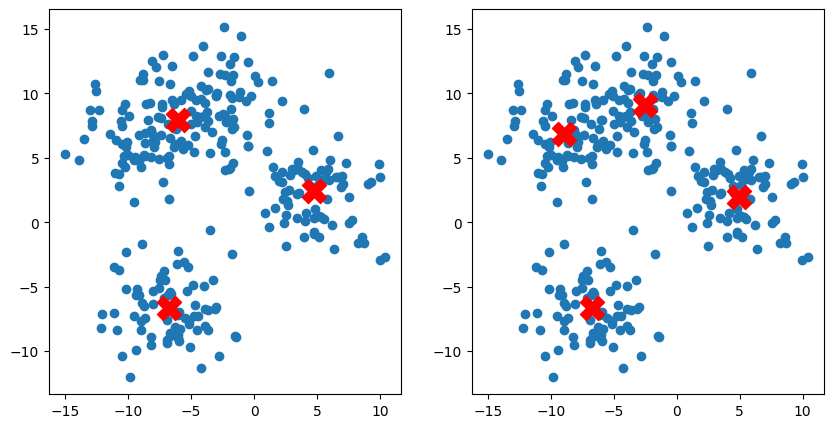

In [37]:
# 최적의 k 개수는 3 또는 4가 된다
k_means_3 = KMeans(n_clusters=3)
k_means_3.fit_predict(data)
k_means_4 = KMeans(n_clusters=4)
k_means_4.fit_predict(data)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')  # 원본데이터의 모습
plt.scatter(k_means_3.cluster_centers_[:,0],k_means_3.cluster_centers_[:,1],s=300,
            c='red',
            marker='X')  # 군집의 중심

plt.subplot(1,2,2)
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')  # 원본데이터의 모습
plt.scatter(k_means_4.cluster_centers_[:,0],k_means_4.cluster_centers_[:,1],s=300,
            c='red',
            marker='X')  # 군집의 중심

plt.show()

# 실전 예제
https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

In [40]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/refs/heads/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
X_numerics = df.loc[: , 'Age': ]
X_numerics

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


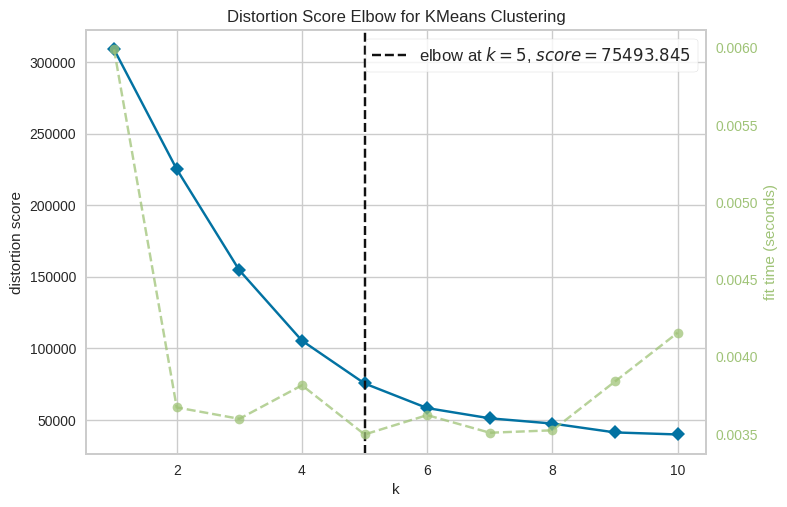

In [47]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

k = 5

In [65]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

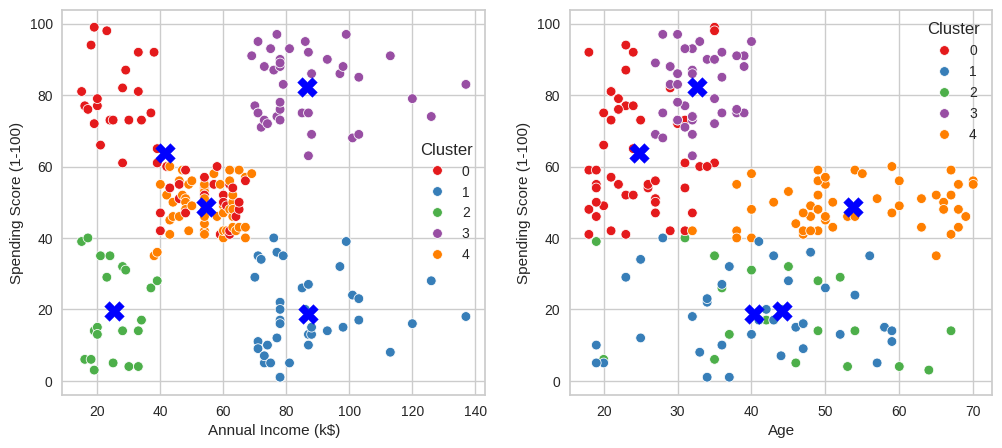

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subplots 생성
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 scatter plot
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

# 두 번째 scatter plot
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# 군집 중심점 추가
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], marker='X', s=200, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2], marker='X', s=200, c="blue")

# 그래프 표시
plt.show()


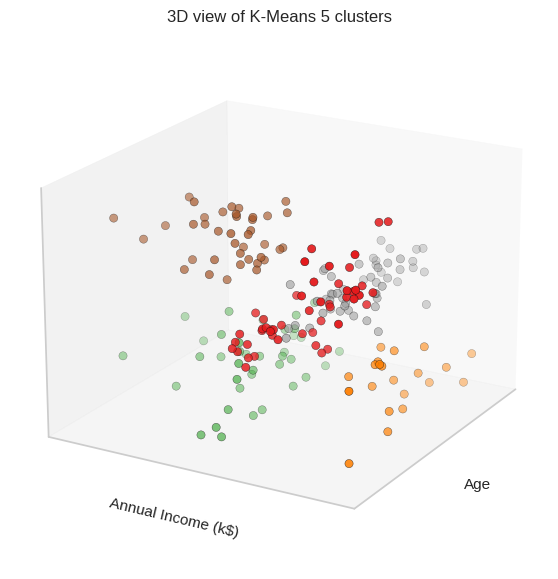

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(KM5_clustered['Age'],
                KM5_clustered['Annual Income (k$)'],
                KM5_clustered['Spending Score (1-100)'],
                c=KM5_clustered['Cluster'],
                s=35, edgecolor='k', cmap=plt.cm.Set1)

# Hide ticks on axes
ax.get_xaxis().set_ticks([])  # Remove x-axis ticks
ax.get_yaxis().set_ticks([])  # Remove y-axis ticks
ax.get_zaxis().set_ticks([])  # Remove z-axis ticks

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')

# Adjust the viewing angle and distance
ax.view_init(elev=20, azim=210)
ax.dist = 12

# Show the plot
plt.show()


# DBSCAN
  - 밀도가 높은 지역에서 클러스터를 식별하며, 이상치(outlier)를 효과적으로 처리
  - 장점 : 클러스터 수를 미리 정의하지 않아도 된다, 다양한 모양의 클러스터 탐지
  - 단점 : 밀도 기준 설정이 어렵고 데이터 크기가 큰 경우 느려질수 있다

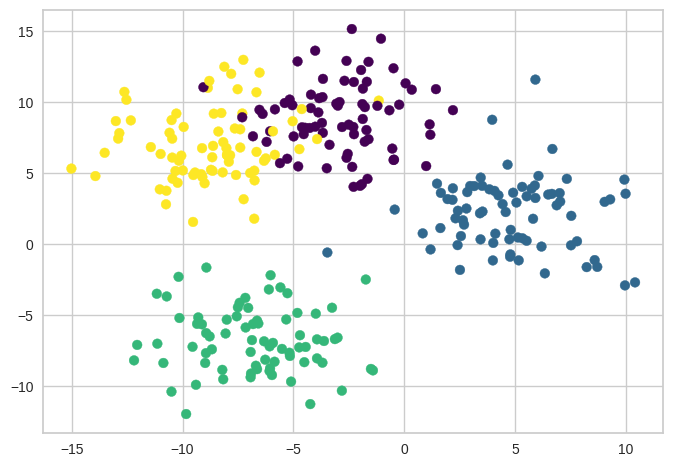

In [77]:
# 학습용 데이터 시각화
plt.scatter(data[:,0], data[:,1],
            c=labels,
            cmap='viridis')
plt.show()

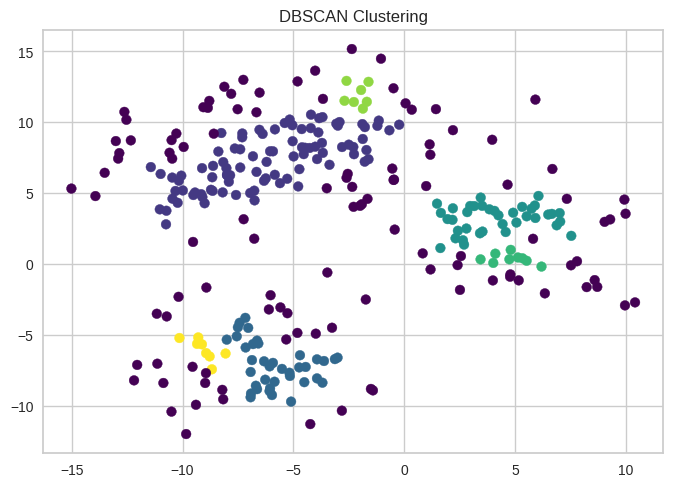

In [90]:
from sklearn.cluster import DBSCAN
# eps=0.5는 두 점이 군집으로 간주되기 위한 최대 거리를 0.5로 설정.
# min_samples=5는 군집을 형성하려면 최소 5개의 포인트가 필요함.
dbscan = DBSCAN(eps=1.0, min_samples=5)

db_labels = dbscan.fit_predict(data)
db_labels
# 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=db_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

데이터 로드

In [91]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hrhuynguyen/2d-spatial-dataset")

print("Path to dataset files:", path)

100%|██████████| 71.9k/71.9k [00:00<00:00, 48.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hrhuynguyen/2d-spatial-dataset/versions/1


In [101]:
from glob import glob
csvs = glob(path+'/**/*.*',recursive=True)

In [102]:
df_weather = pd.read_csv(csvs[0])
df_complex = pd.read_csv(csvs[1])

In [104]:
df_weather_data = df_weather.drop(df_weather.columns[[0, 1, -1]], axis=1)
df_weather_true_labels = df_weather.iloc[:, -1]
df_complex_true_labels = df_complex.iloc[:, -1]
df_complex_data = df_complex.iloc[:, :-1]

In [106]:
#Function to run K-means clustering
def compute_kmeans_clustering(df, k):
    kmodel=KMeans(n_clusters=k, random_state=2464063)
    clusters=kmodel.fit_predict(df)
    return clusters, kmodel

#Run K-means for k=8 and k=12 twice for the Complex8 dataset
clusters_k8_1, kmeans_k8_1 = compute_kmeans_clustering(df_complex_data, 8)
clusters_k8_2, kmeans_k8_2 = compute_kmeans_clustering(df_complex_data, 8)
clusters_k12_1, kmeans_k12_1 = compute_kmeans_clustering(df_complex_data, 12)
clusters_k12_2, kmeans_k12_2 = compute_kmeans_clustering(df_complex_data, 12)

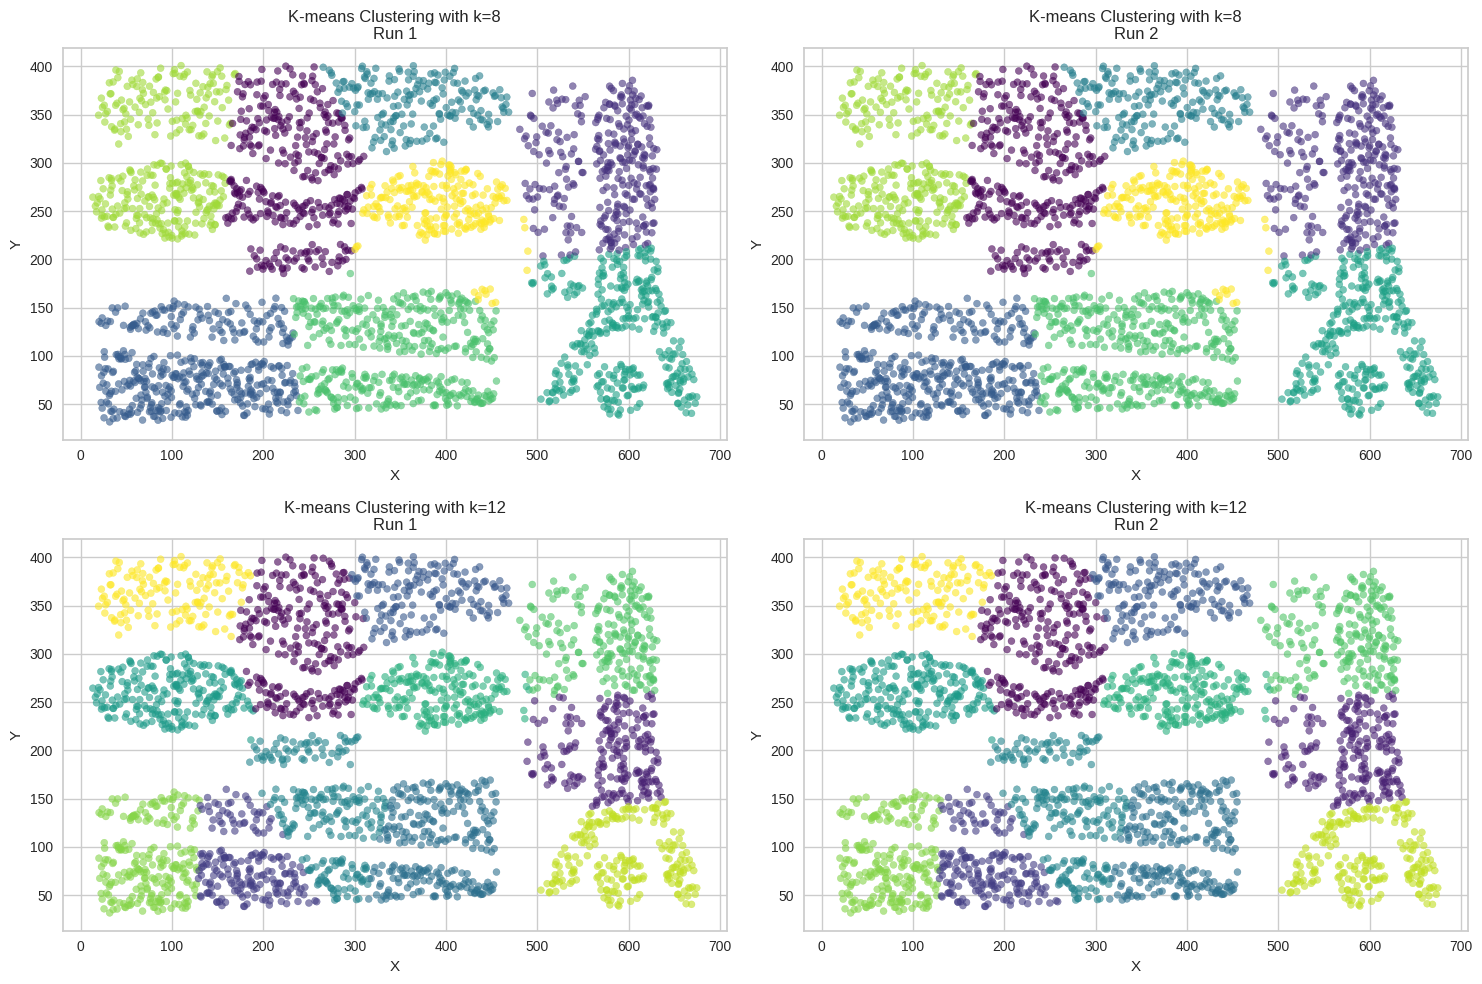

In [107]:
#Function to create a scatter plot for the clusters
def plot_clusters(df, clusters, k, subplot_title, ax):
    scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', s=25, alpha=0.6)
    ax.set_title(f'K-means Clustering with k={k}\n{subplot_title}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    return scatter

#Create figure to contain all subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Plot result
scatter1 = plot_clusters(df_complex_data, clusters_k8_1, 8, 'Run 1', axs[0, 0])
scatter2 = plot_clusters(df_complex_data, clusters_k8_2, 8, 'Run 2', axs[0, 1])
scatter3 = plot_clusters(df_complex_data, clusters_k12_1, 12, 'Run 1', axs[1, 0])
scatter4 = plot_clusters(df_complex_data, clusters_k12_2, 12, 'Run 2', axs[1, 1])

#Display the plot
plt.tight_layout()
plt.show()

데이터 컬럼:
- CustomerID: 고객 식별자
- Balance: 계좌 잔고
- Purchases: 총 구매 금액
- Payments: 총 지불 금액
- CreditLimit: 신용 한도
- Tenure: 고객 관계 기간 (개월 단위)

In [112]:
# path 경로 하위에 있는 파일 찾기
from glob import glob
csvs = glob(path+'/**/*.*',recursive=True)
df = pd.read_csv(csvs[0])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [114]:
df=df.drop(columns=['Z_CostContact','Z_Revenue'],index=1)

In [115]:
object_data=df.select_dtypes('object')
numeric_data=df.select_dtypes(('float64','int64'))

데이터 스케일링

In [122]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
Encoder=LabelEncoder()
for col in object_data.columns:
    df[col]=Encoder.fit_transform(df[col])

scaler=StandardScaler()
x=scaler.fit_transform(df)
df=pd.DataFrame(data=x,columns=df.columns)
df.dropna(inplace=True)

PCA  특성 공학.... 차원을 축소

In [123]:
import numpy as np
from sklearn.decomposition import PCA

pca=PCA(n_components=None)

pca_transformed_data = pca.fit_transform(df)

n_components_selected = pca.n_components_
print(f"Number of components selected to retain 95% variance: {n_components_selected}")

pca_df = pd.DataFrame(data=pca_transformed_data, columns=[f'PC{i+1}' for i in range(n_components_selected)],index=df.index)

print(pca_df.head())

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:")
print(explained_variance)

Number of components selected to retain 95% variance: 27
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.764496 -0.358338 -0.395666  1.976284 -0.600228  0.633044  0.062801   
1  1.612688 -0.160528 -1.090903 -0.224309 -0.003357 -0.011295 -0.370740   
2 -2.507116 -1.455149  0.214249  0.022412  0.118272  0.842668 -0.793801   
3 -0.445268  0.006988 -0.455632  0.329562  0.744148 -1.056221 -0.311693   
4  0.707420  1.320930 -0.673080 -0.504629 -0.882865  1.069236 -0.804778   

        PC8       PC9      PC10  ...      PC18      PC19      PC20      PC21  \
0  1.016439 -0.645545 -0.212438  ... -0.690064 -0.110865  0.010428  0.719909   
1  0.653415  1.401878 -0.388541  ... -0.358494 -0.608564  1.023728 -0.712692   
2  1.080184 -0.004365 -0.001170  ...  0.053285 -0.203909 -0.091866 -0.121586   
3 -0.493253 -1.499612  1.719636  ...  0.339035  0.000137  0.203077 -0.160518   
4  0.771253  0.255619 -0.075224  ... -0.745987  0.105668 -0.293127 -0.257020   

       PC22

Using 4 pca will choose more than 5% variances.

In [124]:
# keeping more than 5% PCA
pca = PCA(n_components=None)
pca_transformed_data = pca.fit_transform(df)

explained_variance = pca.explained_variance_ratio_

components_to_keep = [i for i, variance in enumerate(explained_variance) if variance > 0.05]

pca_filtered_data = pca_transformed_data[:, components_to_keep]

pca_df = pd.DataFrame(
    data=pca_filtered_data,
    columns=[f'PC{i+1}' for i in components_to_keep],
    index=df.index
)

print(f"Number of components selected (variance > 5%): {len(components_to_keep)}")
print("PCA DataFrame:")
print(pca_df.head())

print("\nExplained Variance Ratio of Selected Components:")
print(explained_variance[components_to_keep])

Number of components selected (variance > 5%): 4
PCA DataFrame:
        PC1       PC2       PC3       PC4
0  3.764496 -0.358338 -0.395666  1.976284
1  1.612688 -0.160528 -1.090903 -0.224309
2 -2.507116 -1.455149  0.214249  0.022412
3 -0.445268  0.006988 -0.455632  0.329562
4  0.707420  1.320930 -0.673080 -0.504629

Explained Variance Ratio of Selected Components:
[0.24193119 0.07713449 0.07156371 0.05361518]


In [125]:
pca_df

,PC1,PC2,PC3,PC4
0,3.764496,-0.358338,-0.395666,1.976284
1,1.612688,-0.160528,-1.090903,-0.224309
2,-2.507116,-1.455149,0.214249,0.022412
3,-0.445268,0.006988,-0.455632,0.329562
4,0.707420,1.320930,-0.673080,-0.504629
...,...,...,...,...
2234,2.324109,0.954379,-1.494263,1.544021
2235,-0.923535,2.903737,1.281503,0.348467
2236,1.435591,0.154142,0.900493,-1.280155
2237,1.761038,1.245280,-1.242213,-0.805531


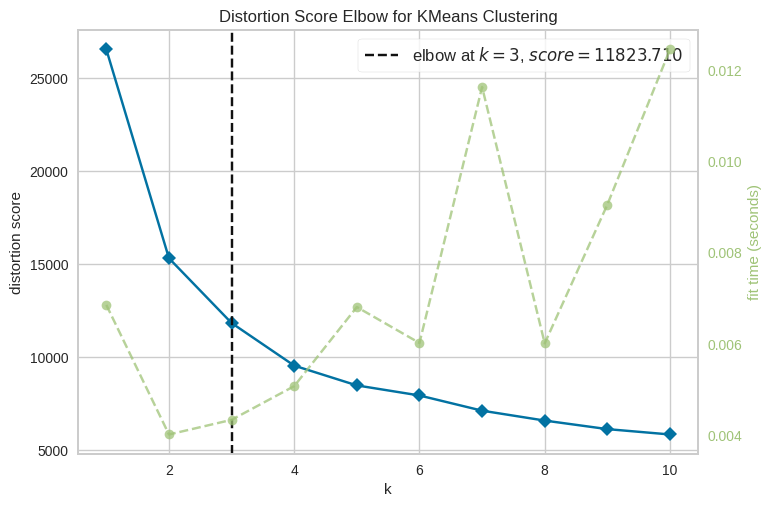

In [128]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(pca_df)
visualizer.show()
plt.show()

실루엣
  - 클러스터의 결과를평가하기위한 도구
  - 실루엣 점수는 각 데이터 포인트가 얼마나 잘 자신의 클러스터에 속하며, 다른 클러스터와 얼마나 명확히 구분되는지 나타낸다
  - 1: 완벽하게  클러스터링
  - 0 : 클러스터 경계에 위치
  - 음수 : 잘못된 클러스터링

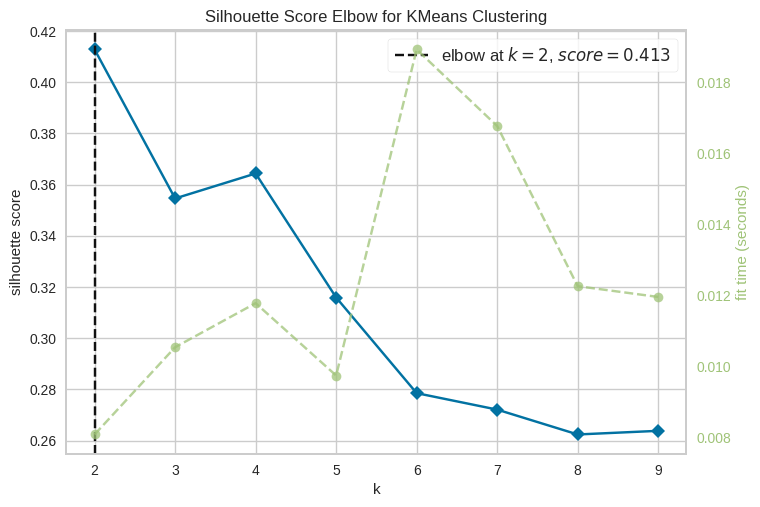

In [129]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(pca_df)
visualizer.show()
plt.show()

- 수치형 데이터를 확보
- 범주형은 숫치형 데이로 인코딩(라벨)
- 데이터 스케일 맞춤
- 컬럼이 많으면 PCA 차원축소
- 군집에 필요한 k 개수를 구한다
  - 엘보우, 실루엣 동시에 고려해서 판단


와인품종 데이터

In [131]:
!pip install ucimlrepo -qq

In [132]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

In [135]:
y.value_counts()

,count
class,
2,71
1,59
3,48


In [136]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


1. PCA로 차원을 축소...
2. 데이터를 분석해서 상관관계가 높은 또는 연관성이 높은 컬럼을 추출해서

In [137]:
X.dropna(inplace=True)

<ipython-input-137-32f8c2353909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


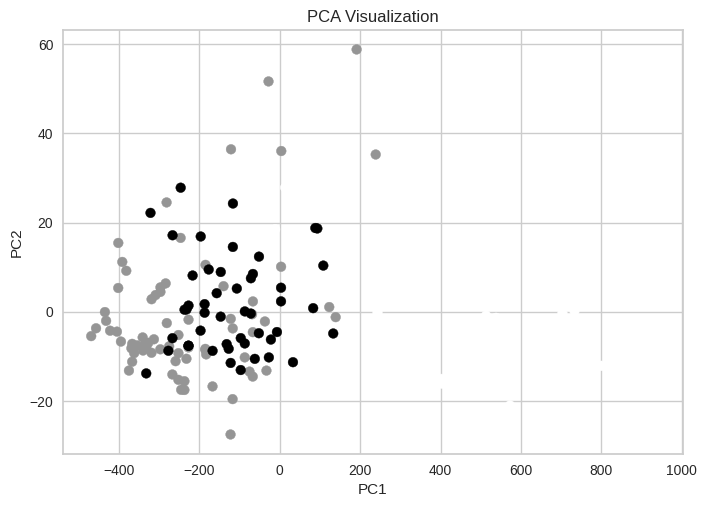

In [153]:
pca = PCA(n_components=2)
X_pca =  pca.fit_transform(X)
# 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y['class'].values)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

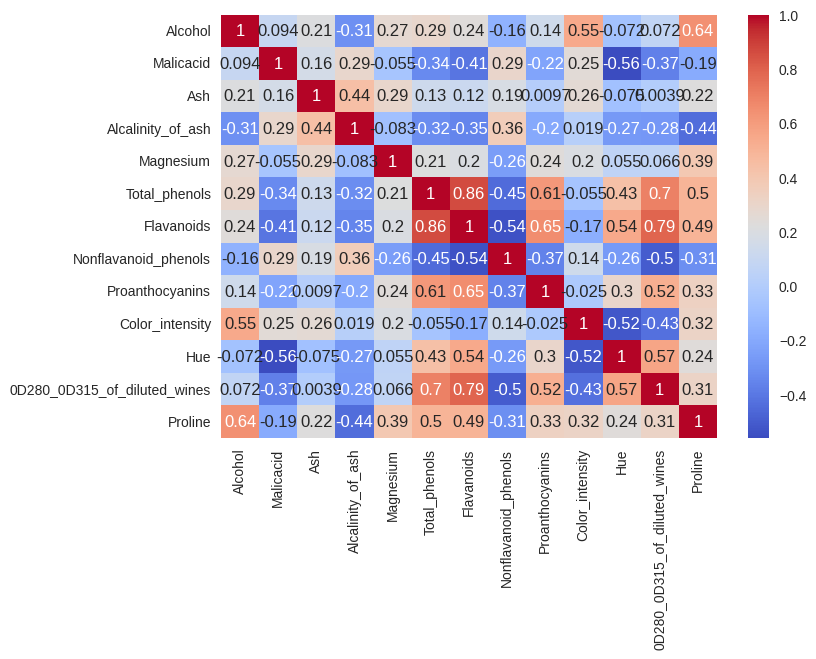

In [155]:
X.corr()
# 히트맵
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


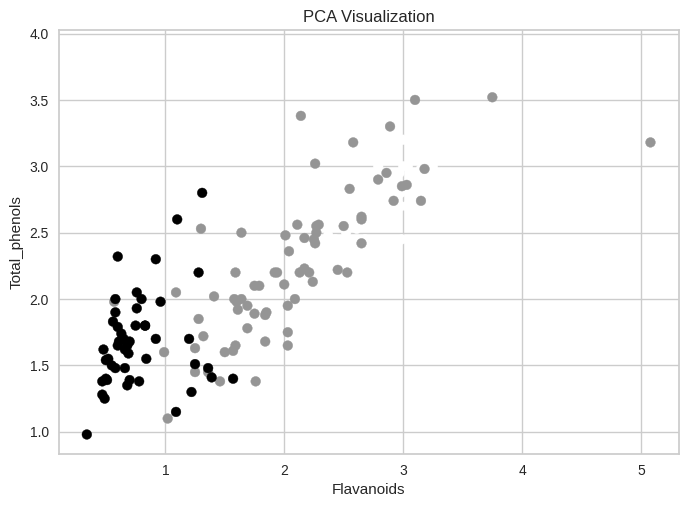

In [161]:
plt.scatter(X.loc[:, 'Flavanoids'], X.loc[:, 'Total_phenols'], c=y['class'].values)
plt.xlabel('Flavanoids')
plt.ylabel('Total_phenols')
plt.title('PCA Visualization')
plt.show()

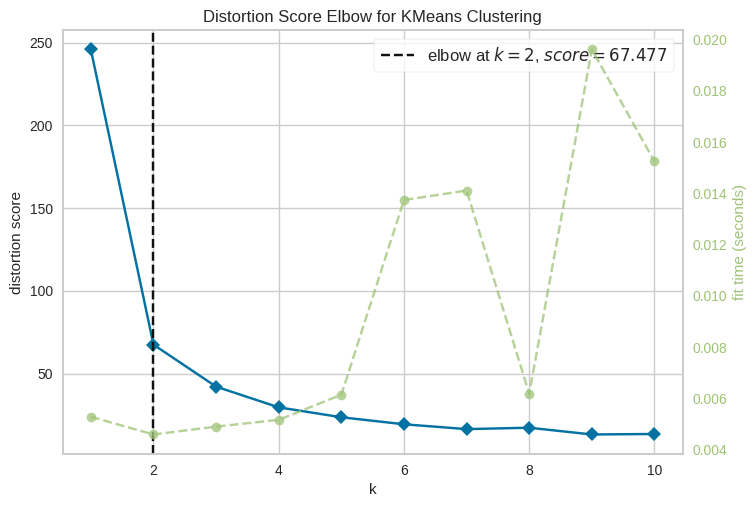

In [162]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X.loc[:, ['Flavanoids', 'Total_phenols']])
visualizer.show()
plt.show()

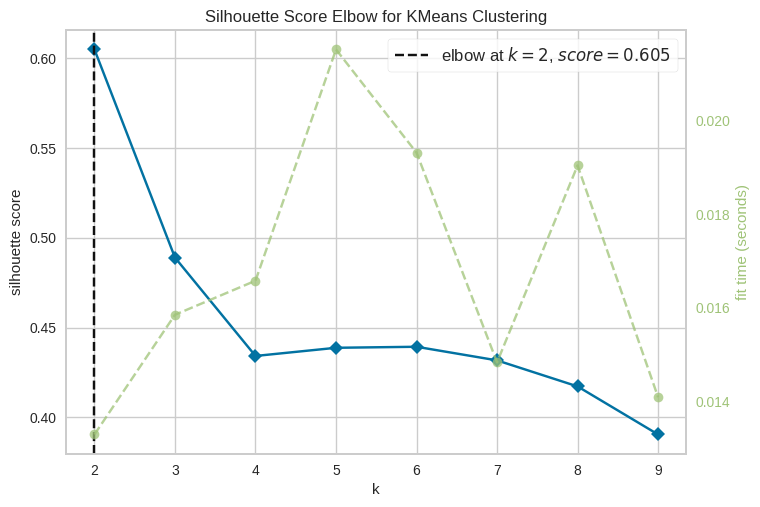

In [163]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X.loc[:, ['Flavanoids', 'Total_phenols']])
visualizer.show()
plt.show()